In [1]:
# Import sys, then tell python where to find the nEXO-specific classes
# I'll assume you're in the sensitivity/work directory, as shown here by !pwd

import sys
!pwd
sys.path.append('../../../modules')

/g/g20/lenardo1/nEXO/sensitivity/work/SensitivityPaper2020_scripts/CaioLowEnergyResolutionStudy


In [17]:
# Import useful libraries for analysis

import pandas as pd
import histlite as hl
import numpy as np
from matplotlib import pyplot as plt
import os

plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10,8)

from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

In [3]:
# Import the nEXO sensitivity classes

import nEXOFitWorkspace
import nEXOFitModel
import nEXOFitLikelihood

In [4]:
categories_list = ['gaus','stat_only','const_noise']
outputdir = '/p/lustre1/lenardo1/sensitivity_output/June23_LowEResolution_test/'

all_files = os.listdir(outputdir)
h5_files = [filename for filename in all_files if filename.endswith('.h5')]

dfdict = dict()

for category in categories_list:
    print('Loading data for {}'.format(category))
    df_list = [pd.read_hdf(outputdir+filename) for filename in h5_files if '_'+category+'_' in filename]
    dfdict[category] = pd.concat(df_list,ignore_index=True)
    print('---> Loaded {} toy datasets'.format(len(dfdict[category])))


Loading data for gaus
---> Loaded 5000 toy datasets
Loading data for stat_only
---> Loaded 5000 toy datasets
Loading data for const_noise
---> Loaded 5000 toy datasets


In [35]:
# Get the median values of lambda

maskdict = dict()

for key, df in dfdict.items():
    print('Running {}'.format(key))
    
    good_fit_mask = []
    
    
    
    for index,row in df.iterrows():
        if index > 1000:
            good_fit_mask.append(False)
        elif np.sum(row['fixed_fit_acc_covar']) < len(row['fixed_fit_acc_covar'])-1:
            good_fit_mask.append(False)
        else:
            good_fit_mask.append(True)
            
    maskdict[key] = np.array(good_fit_mask)
    print('---> Convergence fraction: {:3.3}'.format(np.sum(maskdict[key])/len(maskdict[key])))
            
    
        

Running gaus
---> Convergence fraction: 0.2
Running stat_only
---> Convergence fraction: 0.199
Running const_noise
---> Convergence fraction: 0.2


Running gaus
---> Median 90%CL on signal counts: 9.432860717264386
---> Std Dev of 90%CL on signal counts: 5.757092374594206
Running stat_only
---> Median 90%CL on signal counts: 9.25771476230192
---> Std Dev of 90%CL on signal counts: 5.600383128873336
Running const_noise
---> Median 90%CL on signal counts: 9.357798165137615
---> Std Dev of 90%CL on signal counts: 5.516127599883731


Text(0.5, 0, '90% CL on signal counts for given toy')

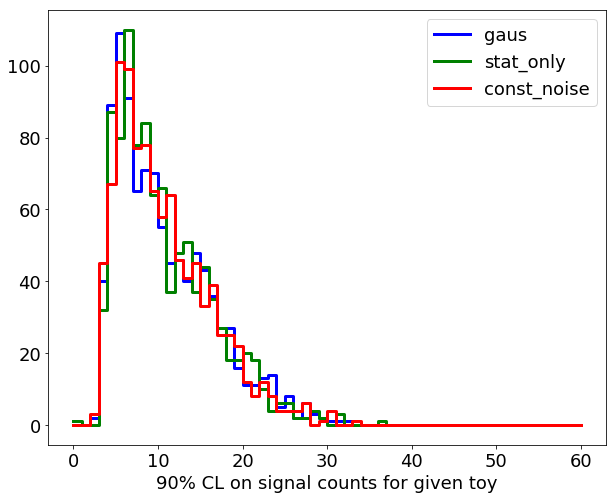

In [36]:
histdict = dict()
mediandict = dict()
sigmadict = dict()

for key, df in dfdict.items():
    print('Running {}'.format(key))
    
    histdict[key] = hl.hist(dfdict[key]['90CL_crossing'].loc[maskdict[key]], bins=np.linspace(0.,60.,61))
    
    mediandict[key] = np.median(dfdict[key]['90CL_crossing'].loc[maskdict[key]])
    sigmadict[key] = np.std(dfdict[key]['90CL_crossing'].loc[maskdict[key]])
    
    print('---> Median 90%CL on signal counts: {}'.format(mediandict[key]))
    print('---> Std Dev of 90%CL on signal counts: {}'.format(sigmadict[key]))
    
    hl.plot1d(histdict[key],label=key,linewidth=3)

    
plt.legend()
plt.xlabel('90% CL on signal counts for given toy')
            
 

gaus
stat_only
const_noise


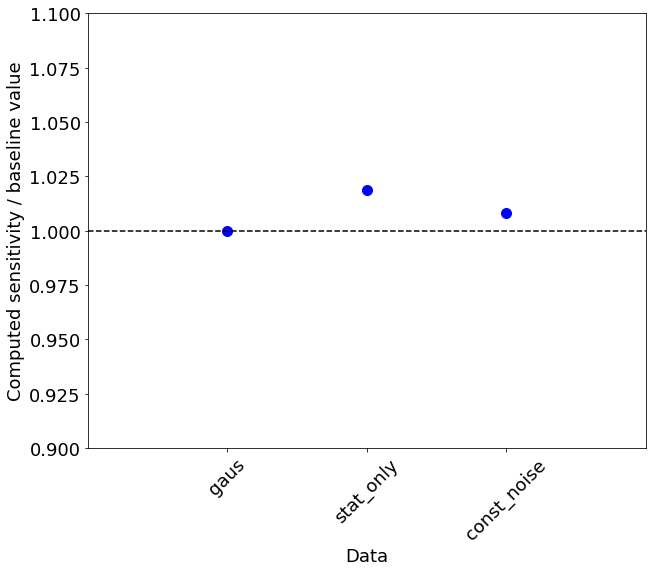

In [37]:
reference = mediandict['gaus']

x_points = []
y_points = []
x_ticks = []
x_tick_labels = []

counter = 0

for key,value in mediandict.items():
    
    print(key)
   
    #plt.plot(factor,(1/value)/(1/mediandict['Baseline']),'ob',markersize=10)
    
    x_points.append(counter)
    y_points.append((1/value)/(1/reference))
    
    x_ticks.append(counter)
    x_tick_labels.append(key)
    
    counter += 1
    
x_points = np.array(x_points)
y_points = np.array(y_points)
    
plt.plot(x_points,y_points,'ob',markersize=10)
#plt.xscale('log')
plt.ylim(0.9,1.1)
plt.xlim(-1.,3)
plt.ylabel('Computed sensitivity / baseline value')
plt.xlabel('Data')
plt.xticks(x_ticks,x_tick_labels,rotation=45)
plt.plot(np.linspace(-1,3,10),np.ones(10),'--k')
plt.savefig('sensitivity_for_different_smearings.png',dpi=200,bbox_inches='tight')



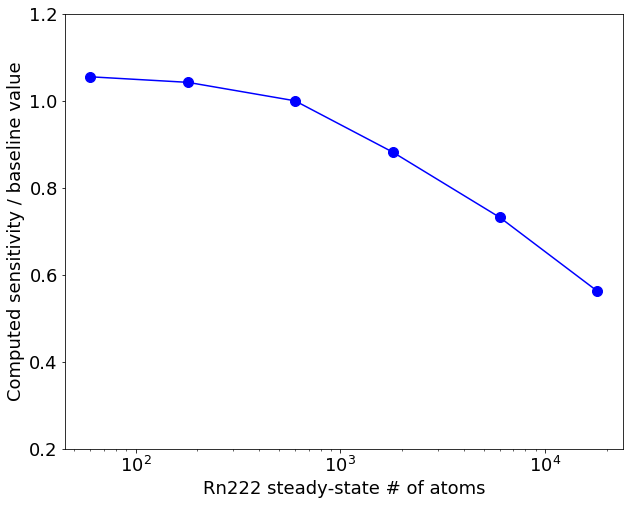

In [45]:
plt.plot(x_points*600,y_points,'-ob',markersize=10)
plt.xscale('log')
plt.ylim(0.2,1.2)
plt.ylabel('Computed sensitivity / baseline value')
plt.xlabel('Rn222 steady-state # of atoms')
#plt.xticks([0.1,1.,10.],['0.1','1','10'])

plt.savefig('rn222_sensitivity_vs_atoms.png',dpi=200,bbox_inches='tight')

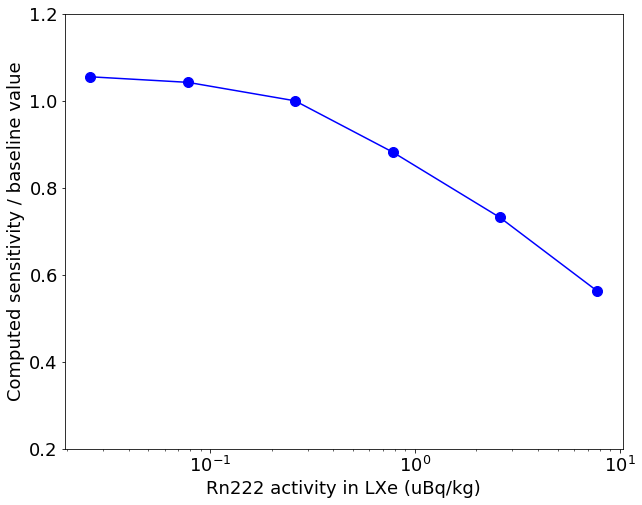

In [46]:
plt.plot(x_points*0.26,y_points,'-ob',markersize=10)
plt.xscale('log')
plt.ylim(0.2,1.2)
plt.ylabel('Computed sensitivity / baseline value')
plt.xlabel('Rn222 activity in LXe (uBq/kg)')
#plt.xticks([0.1,1.,10.],['0.1','1','10'])

plt.savefig('rn222_sensitivity_vs_uBq_per_kg.png',dpi=200,bbox_inches='tight')

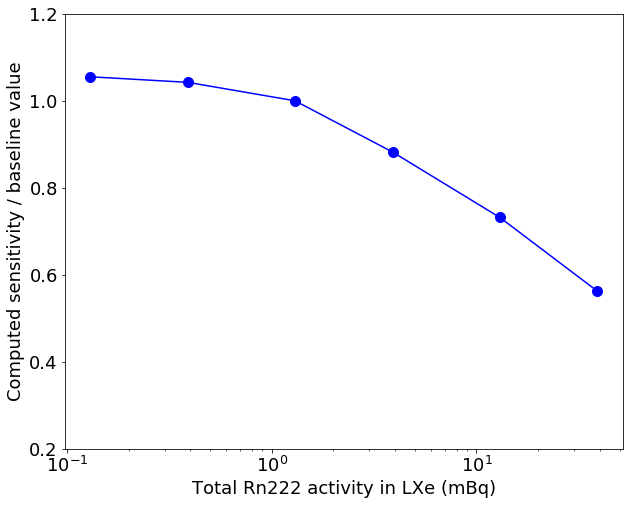

In [48]:
plt.plot(x_points*0.26*5000/1e3,y_points,'-ob',markersize=10)
plt.xscale('log')
plt.ylim(0.2,1.2)
plt.ylabel('Computed sensitivity / baseline value')
plt.xlabel('Total Rn222 activity in LXe (mBq)')
#plt.xticks([0.1,1.,10.],['0.1','1','10'])

plt.savefig('rn222_sensitivity_vs_mBq.png',dpi=200,bbox_inches='tight')